**Exploratory Data Analysis**
---

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = '/Users/patrickokwir/Desktop/Capstone---Predicting-market-value-of-used-cars/Data/cleaned_cars.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.describe()

,price,year,cylinders,odometer
count,327284.000000,327284.000000,327284.000000,3.272840e+05
mean,15666.603864,2010.459262,5.892476,1.018765e+05
std,9936.358070,8.894674,1.566943,8.168088e+04
min,700.000000,1941.000000,3.000000,1.000000e+00
25%,6995.000000,2007.000000,4.000000,4.657400e+04
50%,13988.000000,2013.000000,6.000000,9.600000e+04
75%,23500.000000,2016.000000,8.000000,1.417948e+05
max,37499.000000,2022.000000,12.000000,2.915272e+06


In [5]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,others,15000,2013.0,ford,others,excellent,6.0,gas,128000.0,clean,automatic,rwd,truck,black,al
1,others,27990,2012.0,gmc,others,good,8.0,gas,68696.0,clean,other,4wd,pickup,black,al
2,others,34590,2016.0,chevrolet,others,good,6.0,gas,29499.0,clean,other,4wd,pickup,silver,al
3,others,35000,2019.0,toyota,tacoma,excellent,6.0,gas,43000.0,clean,automatic,4wd,truck,grey,al
4,others,29990,2016.0,chevrolet,others,good,6.0,gas,17302.0,clean,other,4wd,pickup,red,al


In [15]:
# replace pickup with truck in type column
df['type'] = df['type'].replace('pickup', 'truck')

In [6]:
# cylinders column as a categorical variable
df['cylinders'] = df['cylinders'].astype('category')

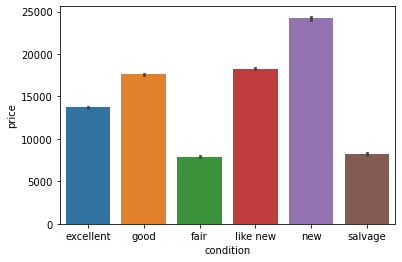

In [7]:
ax = sns.barplot(x="condition", y="price", data=df)

`Cars that are like new have the highest price`

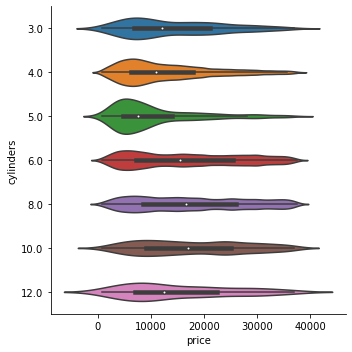

In [8]:
sns.catplot(y="cylinders", x="price",kind = "violin", data=df)

Text(0, 0.5, 'price')

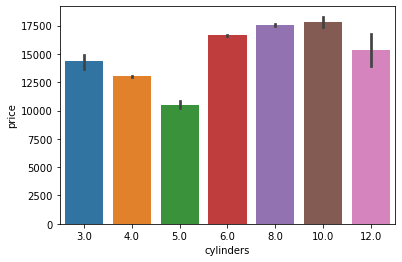

In [9]:
# bar plot of cylinders vs price
ax = sns.barplot(x="cylinders", y="price", data=df)
ax.set_xlabel("cylinders")
ax.set_ylabel("price")

` The higer the cylinders, the higher the price`

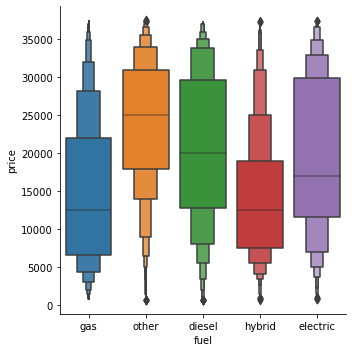

In [10]:
sns.catplot(x="fuel", y="price", kind="boxen",
            data=df)

`The price breakdown are as follows:`
- `Most gas cars are priced between 7 and 22,000`
- `Most diesel cars are priced between 13 and 30,000`
- `Most electric cars are priced between 12 and 30,000`
- `Most hybrid cars are priced between 8 and 18,000`
- `Other between 18 and 31,000`

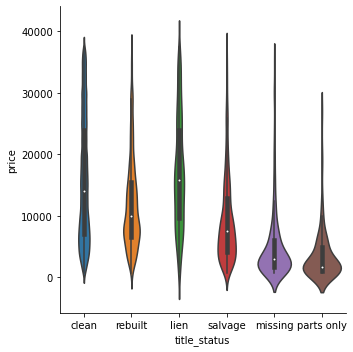

In [11]:
sns.catplot(x="title_status", y="price",kind="violin", data=df)

`Missing and Parts Only cars are priced cheaper than the rest`

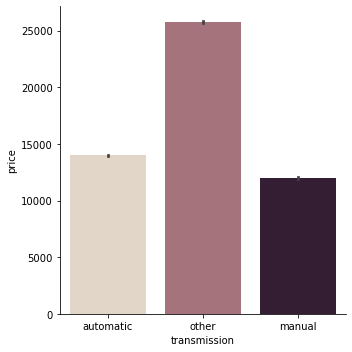

In [12]:
sns.catplot(x="transmission", y="price",kind="bar", palette="ch:.25", data=df)

`Automatic cars are priced higher than manual cars`

<Axes: xlabel='drive', ylabel='price'>

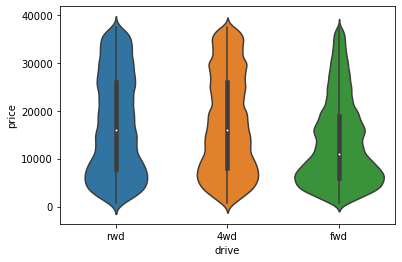

In [13]:
sns.violinplot(x=df.drive, y=df.price)

`4WD and RWD cars are priced higher than FWD cars`

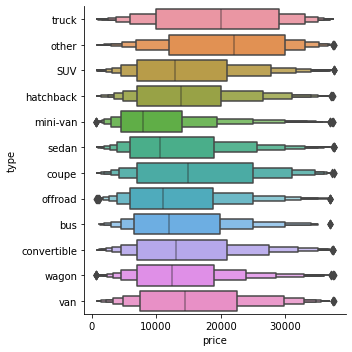

In [16]:
sns.catplot(y="type", x="price",kind="boxen", data=df);

`Trucks are priced higher than cars`

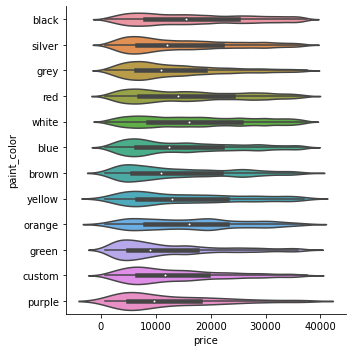

In [17]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);

`non-traditional factory colors are priced higher than traditional colors`

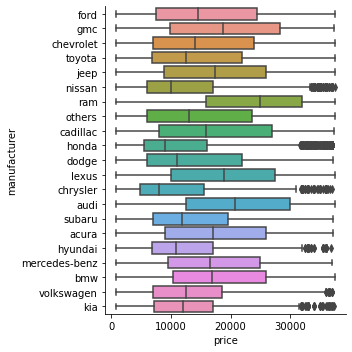

In [18]:
sns.catplot(y="manufacturer", x="price",kind="box", data=df);

`RAM, Audi, and BMW are the most expensive brands`

In [19]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,others,15000,2013.0,ford,others,excellent,6.0,gas,128000.0,clean,automatic,rwd,truck,black,al
1,others,27990,2012.0,gmc,others,good,8.0,gas,68696.0,clean,other,4wd,truck,black,al
2,others,34590,2016.0,chevrolet,others,good,6.0,gas,29499.0,clean,other,4wd,truck,silver,al
3,others,35000,2019.0,toyota,tacoma,excellent,6.0,gas,43000.0,clean,automatic,4wd,truck,grey,al
4,others,29990,2016.0,chevrolet,others,good,6.0,gas,17302.0,clean,other,4wd,truck,red,al


In [20]:
# drop region column
df.drop('region', axis=1, inplace=True)

In [21]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [22]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

In [23]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

In [24]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [29]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# drop title status column
df.drop('title_status', axis=1, inplace=True)


In [39]:
df.drop('transmission', axis=1, inplace=True)

In [40]:
y= df.price
X= df.drop('price', axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(261827, 11) (261827,)
(65457, 11) (65457,)


In [43]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(X_test,y_test)*100)

Mean Absolute Error: 2471.86
Mean Squared Error: 16662851.3
Root Mean Squared Error: 4082.02
83.13450182367038


In [44]:
# get feature importance
feature_imp = pd.Series(regressor.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

year            0.433670
odometer        0.186013
manufacturer    0.065108
cylinders       0.062519
fuel            0.049822
type            0.047296
state           0.039579
drive           0.037081
model           0.032644
paint_color     0.024450
condition       0.021820
dtype: float64

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [47]:
import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (model.score(X_test, y_test)*100)


79.79052128772449


In [ ]:
kfold = KFold(n_splits=10, random_state=7)

In [49]:
# grid search cv for random forest

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10],
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 2000]}
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

/Users/patrickokwir/miniconda/envs/DeepLearning/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/patrickokwir/miniconda/envs/DeepLearning/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/patrickokwir/miniconda/envs/DeepLearning/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitl

KeyboardInterrupt: 